In [1]:
#Read the data excel file
import pandas as pd
import numpy as np
labeled_data=pd.read_excel('CTI_sentences.xlsx')
tactic_one_hot_list=['Initial Access', 'Execution', 'Defense Evasion', 'Command and Control', 'Privilege Escalation', 'Persistence', 'Lateral Movement', 'DataLeak', 'Exfiltration', 'Impact']

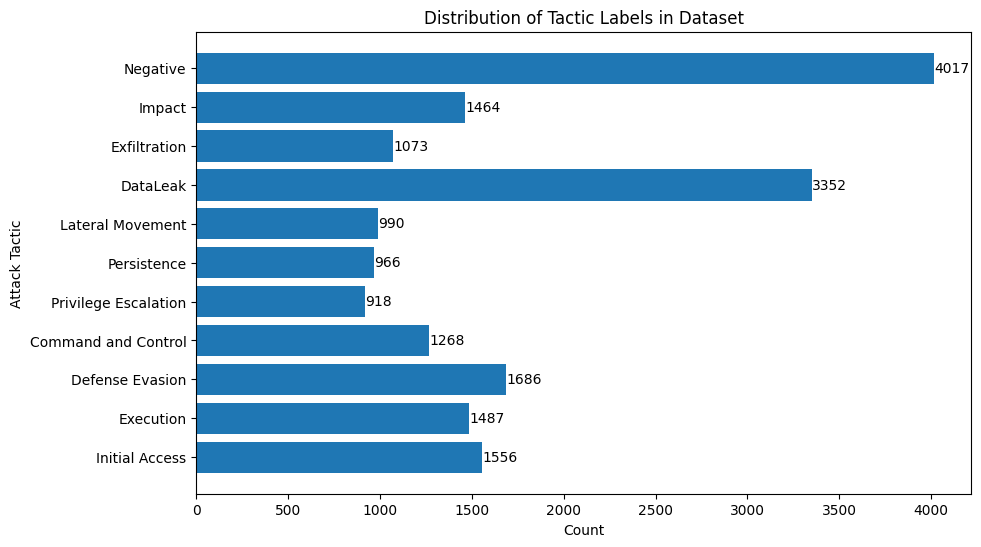

In [2]:
#Tactics Data Distribution: different tactics in the dataset
data_tactic=labeled_data.dropna(subset=['Tactics'])
all_labeled=data_tactic['Tactics'].values.tolist()
will_be_replaced_by_DataLeak=['Collection','Credential Access','Discovery']
for one_label in will_be_replaced_by_DataLeak:
    for i in range(len(all_labeled)):
        if one_label in all_labeled[i]:
            all_labeled[i]=all_labeled[i].replace(one_label,'DataLeak')
        else:
            all_labeled[i]=all_labeled[i].replace(one_label,'DataLeak')
#calulate the number of each tactic in the dataset
count_dict={}
for one_tactic in tactic_one_hot_list+['Negative']:
    count=0
    for one_line_label_data in all_labeled:
        if one_tactic.lower() in one_line_label_data.lower():
            count+=1
    count_dict[one_tactic]=count
import matplotlib.pyplot as plt

data = count_dict

# Extract the keys and values from the dictionary
keys = list(data.keys())
values = list(data.values())

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(keys, values)
ax.bar_label(bars)
#, str(v), color='black', fontweight='bold')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Attack Tactic')
plt.title('Distribution of Tactic Labels in Dataset')
#plt.xticks(rotation=45, ha='right') # rotate x-axis labels to 45 degrees and align right

# Show the chart
plt.show()


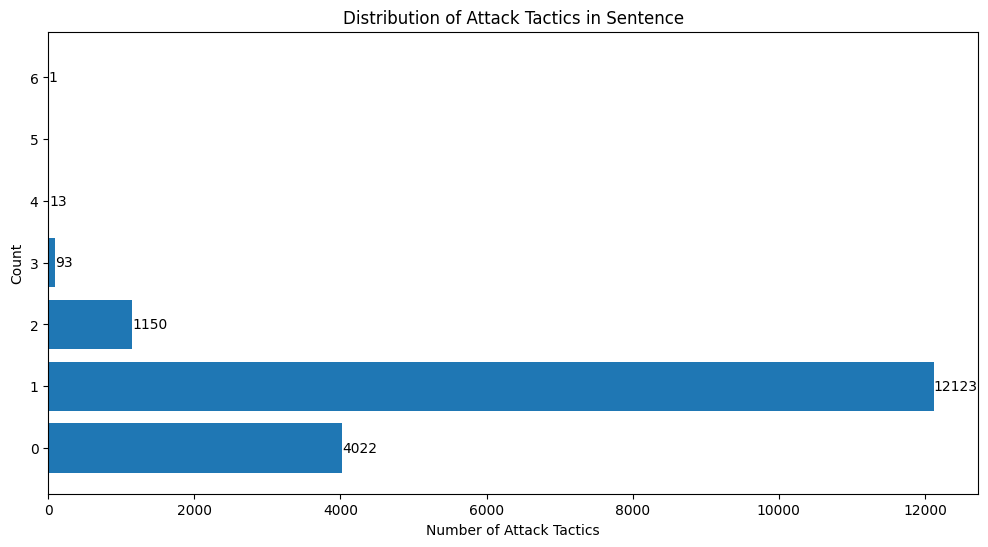

In [81]:
#Tactics Data Distribution: different number of tactics in one sentence
import numpy as np
categories = tactic_one_hot_list
data = all_labeled
data_onehot=[]
for single_data in data:
    one_hot_single=[]
    for single_category in categories:
        if single_category.lower() in single_data.lower():
            one_hot_single.append(1)
        else:
            one_hot_single.append(0)
    data_onehot.append(one_hot_single)
    
distribution = {}
for sublist in data_onehot:
    count = sublist.count(1)
    if count in distribution:
        distribution[count] += 1
    else:
        distribution[count] = 1



import matplotlib.pyplot as plt


# Extract the keys and values from the dictionary
keys = list(distribution.keys())
values = list(distribution.values())

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(keys, values)
ax.bar_label(bars)

# Add labels and title
plt.ylabel('Number of Attack Tactics')
plt.xlabel('Count')
plt.title('Distribution of Attack Tactics in Sentence')

plt.show()


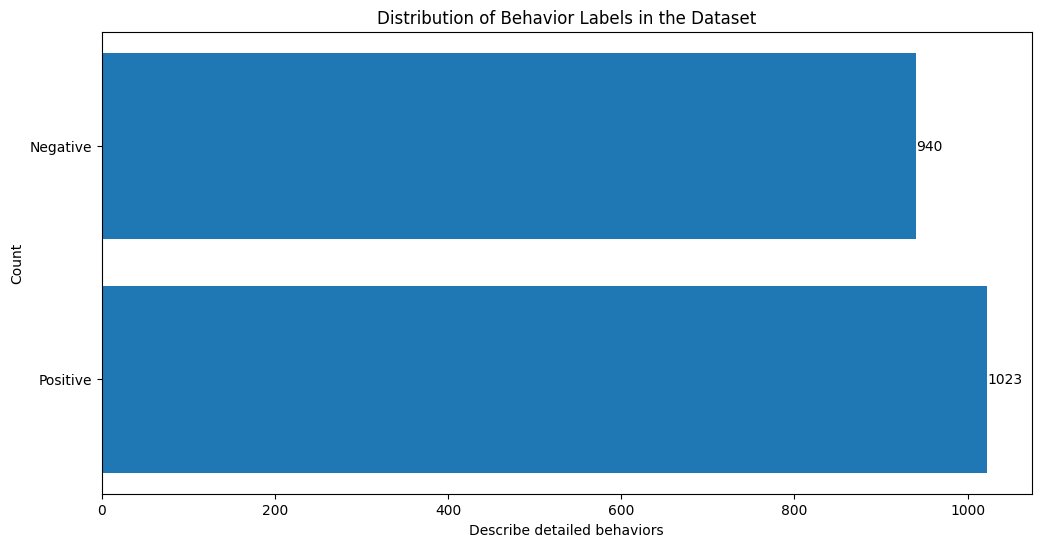

In [77]:
#Behavior Data Distribution: different behavior labels in the dataset
data_behavior=labeled_data.dropna(subset=['Behavior'])
all_labeled=data_behavior['Behavior'].values.tolist()

#replace 1.0 with True, 0.0 with False
for i in range(len(all_labeled)):
    if all_labeled[i]==1.0:
        all_labeled[i]='Positive'
    else:
        all_labeled[i]='Negative'

#visualize the distribution of the data
count_dict={}
for one_tactic in ['Positive','Negative']:
    count=0
    for one_line_label_data in all_labeled:
        if one_tactic==one_line_label_data:
            count+=1
    count_dict[one_tactic]=count
    
import matplotlib.pyplot as plt

data = count_dict

# Extract the keys and values from the dictionary
keys = list(data.keys())
values = list(data.values())

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(keys, values)
ax.bar_label(bars)

# Add labels and title
plt.xlabel('Describe detailed behaviors')
plt.ylabel('Count')
plt.title('Distribution of Behavior Labels in the Dataset')

# Show the chart
plt.show()
